# EDA AGGREGATED

In [1]:
# Import dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans 
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, StandardScaler

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# EDA 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Hitters_Adjusted_Salary.csv")
df

,Unnamed: 0,yearID,playerID,salary,ADJ Salary,GS,InnOuts,PO,A,E,DP,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,0,1985,benedbr01,545000,1.310892e+06,67.0,1698.0,314,35,4.0,1,ATL,NL,70,208,12,42,6,0,0,20.0,0.0,1.0,22,12.0,1.0,1.0,4.0,2.0,8.0
1,1,1985,ceronri01,625000,1.503317e+06,76.0,2097.0,384,48,6.0,4,ATL,NL,96,282,15,61,9,0,3,25.0,0.0,3.0,29,25.0,1.0,1.0,0.0,4.0,15.0
2,2,1985,chambch01,800000,1.924245e+06,27.0,814.0,299,25,1.0,31,ATL,NL,101,170,16,40,7,0,3,21.0,0.0,0.0,18,22.0,4.0,0.0,0.0,1.0,5.0
3,3,1985,harpete01,250000,6.013267e+05,124.0,3299.0,215,10,5.0,0,ATL,NL,138,492,58,130,15,2,17,72.0,9.0,9.0,44,76.0,4.0,3.0,1.0,2.0,13.0
4,4,1985,hornebo01,1500000,3.607960e+06,125.0,3196.0,917,119,11.0,111,ATL,NL,130,483,61,129,25,3,27,89.0,1.0,1.0,50,57.0,4.0,1.0,0.0,6.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15018,15018,2016,reverbe01,6250000,6.739673e+06,80.0,2141.0,170,2,2.0,1,WAS,NL,103,350,44,76,9,7,2,24.0,14.0,5.0,18,34.0,0.0,3.0,2.0,2.0,12.0
15019,15019,2016,robincl01,534900,5.768082e+05,39.0,1071.0,285,12,2.0,30,WAS,NL,104,196,16,46,4,0,5,26.0,0.0,0.0,20,38.0,0.0,2.0,1.0,5.0,4.0
15020,15020,2016,taylomi02,524000,5.650542e+05,48.0,1376.0,125,5,1.0,0,WAS,NL,76,221,28,51,11,0,7,16.0,14.0,3.0,14,77.0,0.0,1.0,0.0,1.0,2.0
15021,15021,2016,werthja01,21733615,2.343639e+07,133.0,3474.0,201,5,1.0,1,WAS,NL,143,525,84,128,28,0,21,69.0,5.0,1.0,71,139.0,0.0,4.0,0.0,6.0,17.0


In [4]:
df = df.drop(columns=["Unnamed: 0", "salary", "teamID", "lgID"], axis=1)

In [5]:
df["ADJ Salary"] = df["ADJ Salary"].astype("int").round()
df = df.loc[(df["ADJ Salary"] > 0), :]
df["ADJ Salary"] = np.log(df["ADJ Salary"])

In [6]:
df.describe()

,yearID,ADJ Salary,GS,InnOuts,PO,A,E,DP,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,15022.000000,15022.000000,15022.000000,15022.000000,15022.000000,15022.000000,15022.000000,15022.000000,15022.000000,15022.000000,15022.000000,15022.000000,15022.000000,15022.000000,15022.000000,15022.000000,15022.000000,15022.000000,15022.000000,15022.000000,15022.000000,15022.000000,15022.000000,15022.000000,15022.00000
mean,2000.660099,14.050117,77.685195,2075.218480,253.303621,88.003062,5.740048,23.158101,91.253162,294.208361,40.281054,78.562175,15.200173,1.694315,8.879909,38.365131,5.832446,2.496206,29.179404,53.521169,2.476301,2.687325,1.846492,2.530821,6.73379
std,8.961206,1.314890,48.688121,1269.755497,268.521931,123.756107,5.523991,33.212226,47.240496,191.310798,31.090316,56.048871,11.787720,2.233168,9.744500,31.344476,9.481489,3.233180,24.581568,38.109376,3.980121,3.334894,2.824046,2.485043,5.55954
min,1985.000000,9.879297,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1993.000000,13.033089,34.000000,939.000000,82.000000,5.000000,2.000000,1.000000,51.000000,125.000000,14.000000,29.000000,5.000000,0.000000,2.000000,13.000000,0.000000,0.000000,10.000000,23.000000,0.000000,0.000000,0.000000,1.000000,2.00000
50%,2000.000000,13.842179,75.000000,2011.500000,178.000000,25.500000,4.000000,6.000000,95.000000,274.000000,34.000000,69.000000,13.000000,1.000000,5.000000,31.000000,2.000000,1.000000,23.000000,47.000000,1.000000,2.000000,1.000000,2.000000,6.00000
75%,2008.000000,15.131481,122.000000,3229.000000,300.000000,118.000000,8.000000,32.000000,135.000000,465.000000,63.000000,124.000000,24.000000,2.000000,13.000000,58.000000,7.000000,4.000000,43.000000,78.000000,3.000000,4.000000,3.000000,4.000000,10.00000
max,2016.000000,17.499634,163.000000,4388.000000,1597.000000,570.000000,42.000000,176.000000,163.000000,716.000000,152.000000,262.000000,59.000000,23.000000,73.000000,165.000000,110.000000,29.000000,232.000000,223.000000,120.000000,35.000000,39.000000,17.000000,35.00000


In [7]:
df = df.reset_index(drop=True)
df

,yearID,playerID,ADJ Salary,GS,InnOuts,PO,A,E,DP,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,1985,benedbr01,14.086218,67.0,1698.0,314,35,4.0,1,70,208,12,42,6,0,0,20.0,0.0,1.0,22,12.0,1.0,1.0,4.0,2.0,8.0
1,1985,ceronri01,14.223184,76.0,2097.0,384,48,6.0,4,96,282,15,61,9,0,3,25.0,0.0,3.0,29,25.0,1.0,1.0,0.0,4.0,15.0
2,1985,chambch01,14.470044,27.0,814.0,299,25,1.0,31,101,170,16,40,7,0,3,21.0,0.0,0.0,18,22.0,4.0,0.0,0.0,1.0,5.0
3,1985,harpete01,13.306892,124.0,3299.0,215,10,5.0,0,138,492,58,130,15,2,17,72.0,9.0,9.0,44,76.0,4.0,3.0,1.0,2.0,13.0
4,1985,hornebo01,15.098653,125.0,3196.0,917,119,11.0,111,130,483,61,129,25,3,27,89.0,1.0,1.0,50,57.0,4.0,1.0,0.0,6.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15017,2016,reverbe01,15.723522,80.0,2141.0,170,2,2.0,1,103,350,44,76,9,7,2,24.0,14.0,5.0,18,34.0,0.0,3.0,2.0,2.0,12.0
15018,2016,robincl01,13.265265,39.0,1071.0,285,12,2.0,30,104,196,16,46,4,0,5,26.0,0.0,0.0,20,38.0,0.0,2.0,1.0,5.0,4.0
15019,2016,taylomi02,13.244677,48.0,1376.0,125,5,1.0,0,76,221,28,51,11,0,7,16.0,14.0,3.0,14,77.0,0.0,1.0,0.0,1.0,2.0
15020,2016,werthja01,16.969801,133.0,3474.0,201,5,1.0,1,143,525,84,128,28,0,21,69.0,5.0,1.0,71,139.0,0.0,4.0,0.0,6.0,17.0


In [8]:
agg_df = df.groupby(["playerID"]).filter(lambda g: g["yearID"].count() > 3)
agg_df = agg_df.groupby(["playerID"]).mean()

In [11]:
agg_df

,yearID,ADJ Salary,GS,InnOuts,PO,A,E,DP,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
playerID,,,,,,,,,,,,,,,,,,,,,,,,,
abbotje01,1999.500000,12.817947,34.000000,887.000000,71.000000,0.500000,2.000000,0.000000,53.500000,139.500000,18.500000,36.750000,8.000000,0.500000,4.250000,20.250000,1.500000,1.250000,9.500000,21.250000,0.500000,0.750000,1.250000,1.750000,2.250000
abbotku01,1997.100000,13.326749,54.700000,1460.200000,101.600000,135.600000,9.100000,29.600000,70.200000,204.400000,27.300000,52.300000,10.900000,2.300000,6.200000,24.200000,2.200000,1.100000,13.300000,57.100000,1.100000,1.700000,2.100000,1.200000,3.700000
abnersh01,1990.166667,12.463545,40.500000,1204.000000,116.833333,2.000000,0.333333,0.500000,62.666667,132.166667,14.000000,29.666667,6.000000,0.500000,1.500000,10.666667,0.833333,1.333333,6.833333,24.166667,1.666667,1.166667,0.833333,1.166667,2.333333
abreubo01,2005.000000,15.668490,125.388889,3287.611111,237.277778,8.222222,4.166667,1.388889,129.555556,462.500000,80.000000,135.111111,31.333333,3.277778,15.944444,74.888889,22.166667,7.111111,80.777778,100.888889,6.388889,1.833333,0.388889,4.611111,8.944444
ackledu01,2014.166667,14.799766,87.833333,2386.333333,189.166667,99.666667,2.166667,24.166667,90.833333,298.666667,37.000000,70.166667,13.000000,1.833333,6.666667,30.000000,4.166667,2.000000,25.666667,56.666667,1.500000,0.833333,1.833333,1.500000,3.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yountro01,1989.000000,15.087737,135.000000,3525.555556,363.000000,6.222222,3.666667,2.444444,145.222222,551.000000,83.000000,157.222222,28.888889,6.000000,13.555556,77.000000,14.333333,5.000000,60.222222,77.666667,7.444444,3.777778,3.444444,6.888889,10.777778
zaungr01,2002.444444,13.837663,53.722222,1464.500000,363.888889,23.500000,5.277778,3.333333,62.500000,175.055556,21.722222,43.722222,9.444444,0.500000,4.555556,22.777778,1.277778,0.944444,24.000000,26.833333,1.500000,1.277778,0.777778,1.666667,4.444444
zeileto01,1996.857143,14.761905,126.904762,3353.380952,303.523810,198.428571,17.619048,34.000000,102.761905,360.619048,46.952381,95.428571,18.904762,1.095238,12.047619,52.857143,2.523810,2.428571,45.000000,60.904762,2.238095,2.000000,0.380952,3.857143,10.619048


In [10]:
agg_df.to_csv("agg.csv")

# Linear Regression Benchmark

In [42]:
df = pd.read_csv("agg.csv", index_col="playerID")
df

# Assign X and y

X = df.drop(columns=["ADJ Salary", "yearID"], axis=1)

# X = df[["RBI","R","2B","HR"]]


y = df["ADJ Salary"]

# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

# Create a scaler to standardize the data

scaler = StandardScaler()

# Train the scaler with the X_train data.

scaler.fit(X_train)

# Transform X_train and X_test.

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression().fit(X_train_scaled, y_train)

# Score the model

print(f"STDSCALER Linear Regression Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"STDSCALER Linear Regression Testing Data Score: {model.score(X_test_scaled, y_test)}")

STDSCALER Linear Regression Training Data Score: 0.7258090630542127
STDSCALER Linear Regression Testing Data Score: 0.7451020052506878


In [29]:
df = pd.read_csv("agg.csv", index_col="playerID")
df

# Assign X and y

X = df.drop(columns=["ADJ Salary", "yearID"], axis=1)
y = df["ADJ Salary"]

print(X.shape)
print(y.shape)



(1449, 23)
(1449,)


AttributeError: 'Series' object has no attribute 'reshape'

MSE: 3.0492588486816996
R2: -3.3406740592403876
LASSO Regression Training Data Score: -3.170479901991156
LASSO Regression Testing Data Score: -3.3406740592403876


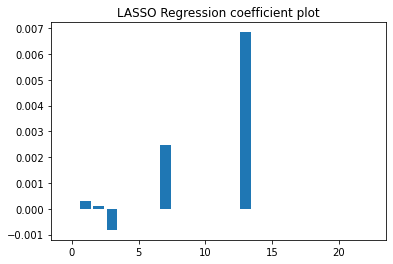

ValueError: Found array with 0 feature(s) (shape=(1086, 0)) while a minimum of 1 is required by MinMaxScaler.

In [30]:
# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

# Create a scaler to standardize the data

scaler = StandardScaler()

# Train the scaler with the X_train data.

scaler.fit(X_train)

# Transform X_train and X_test.

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso_reg = Lasso().fit(X_train, y_train)

predicted = lasso_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"MSE: {mse}")
print(f"R2: {r2}") 

# Score the model

print(f"LASSO Regression Training Data Score: {lasso_reg.score(X_train_scaled, y_train)}")
print(f"LASSO Regression Testing Data Score: {lasso_reg.score(X_test_scaled, y_test)}")

plt.bar(np.arange(len(lasso_reg.coef_)), lasso_reg.coef_)
plt.title(f'LASSO Regression coefficient plot')
plt.show()  

sel = SelectFromModel(lasso_reg)
sel.fit(X_train_scaled, y_train)
SelectFromModel(estimator=Lasso())

X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)

scaler = MinMaxScaler().fit(X_selected_train)

X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

new_lasso_reg = LinearRegression().fit(X_selected_train_scaled, y_train)
print(f"New LASSO linear regression score: {new_lasso_reg.score(X_selected_test_scaled, y_test)}")

MSE: 2.234995218867518
R2: -2.181555338687883
Ridge Regression Training Data Score: -2.0651346696681556
Ridge Regression Testing Data Score: -2.181555338687883


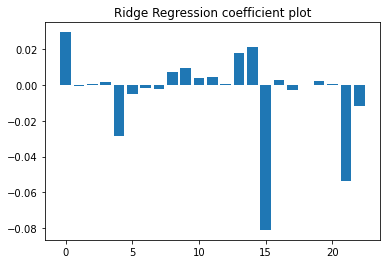

New linear regression score: 0.7166824763426145


In [18]:
df = pd.read_csv("agg.csv", index_col="playerID")
df

# Assign X and y

X = df.drop(columns=["ADJ Salary", "yearID"], axis=1)
y = df["ADJ Salary"]

# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

# Create a scaler to standardize the data

scaler = StandardScaler()

# Train the scaler with the X_train data.

scaler.fit(X_train)

# Transform X_train and X_test.

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_reg = Ridge().fit(X_train, y_train)

predicted = ridge_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"MSE: {mse}")
print(f"R2: {r2}") 

# Score the model

print(f"Ridge Regression Training Data Score: {ridge_reg.score(X_train_scaled, y_train)}")
print(f"Ridge Regression Testing Data Score: {ridge_reg.score(X_test_scaled, y_test)}")

plt.bar(np.arange(len(ridge_reg.coef_)), ridge_reg.coef_)
plt.title(f'Ridge Regression coefficient plot')
plt.show()     

sel = SelectFromModel(ridge_reg)
sel.fit(X_train_scaled, y_train)
SelectFromModel(estimator=Ridge())

X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)

scaler = StandardScaler().fit(X_selected_train)

X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

new_ridge_reg = LinearRegression().fit(X_selected_train_scaled, y_train)
print(f"New linear regression score: {new_ridge_reg.score(X_selected_test_scaled, y_test)}")

MSE: 2.8360204494980836
R2: -3.037125415552615
ElasticNet Regression Training Data Score: -2.883926557889485
ElasticNet Regression Testing Data Score: -3.037125415552615


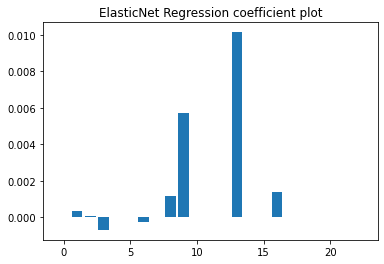

New linear regression score: 0.6990283743913772


In [31]:
df = agg_df.copy()
df

# Assign X and y

X = df.drop(columns=["ADJ Salary", "yearID"], axis=1)
y = df["ADJ Salary"]

# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

# Create a scaler to standardize the data

scaler = StandardScaler()

# Train the scaler with the X_train data.

scaler.fit(X_train)

# Transform X_train and X_test.

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

elasticnet_reg = ElasticNet().fit(X_train, y_train)

predicted = elasticnet_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"MSE: {mse}")
print(f"R2: {r2}") 

# Score the model

print(f"ElasticNet Regression Training Data Score: {elasticnet_reg.score(X_train_scaled, y_train)}")
print(f"ElasticNet Regression Testing Data Score: {elasticnet_reg.score(X_test_scaled, y_test)}")

plt.bar(np.arange(len(elasticnet_reg.coef_)), elasticnet_reg.coef_)
plt.title(f'ElasticNet Regression coefficient plot')
plt.show()  

sel = SelectFromModel(elasticnet_reg)
sel.fit(X_train_scaled, y_train)
SelectFromModel(estimator=ElasticNet())

X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)

scaler = StandardScaler().fit(X_selected_train)

X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

new_elasticnet_reg = LinearRegression().fit(X_selected_train_scaled, y_train)
print(f"New linear regression score: {new_elasticnet_reg.score(X_selected_test_scaled, y_test)}")

In [ ]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
raw_data = ['ADJ Salary', 'GS', 'InnOuts', 'PO',
       'A', 'E', 'DP', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP']

corrmat = agg_df[raw_data].corr()

#setting the size of plot
fig = plt.figure(figsize = (20, 15))

#masking the upper traingle part since matrix is symmetric(repetitive) 

mask = np.triu(np.ones_like(corrmat, dtype=bool))

sns.heatmap(corrmat, vmax = .8,mask=mask, square = True, annot = True)

plt.show()

In [ ]:
sns.pairplot(agg_df[['ADJ Salary', 'R', 'RBI']])

# K-means benchmark

In [ ]:
#Windows KMeans bug fix

import os
os.environ["OMP_NUM_THREADS"] = '1'

df = new_df.copy()
df

# Assign X and y

X = df.drop(columns=["ADJ Salary", "ADJ Salary Group", "yearID", "playerID", "teamID"], axis=1)
y = df["ADJ Salary Group"]

# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

# Create a scaler to standardize the data

scaler = StandardScaler()

# Train the scaler with the X_train data.

scaler.fit(X_train)

# Transform X_train and X_test.

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Finding the best value for k using the Elbow Curve
inertia = []
k = list(range(1, 9))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# K-nearest neighbors

In [ ]:
df = new_df.copy()
df

# Assign X and y

X = df.drop(columns=["ADJ Salary", "ADJ Salary Group", "yearID", "playerID", "teamID"], axis=1)
y = df["ADJ Salary Group"]

# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

# Create a scaler to standardize the data

scaler = StandardScaler()

# Train the scaler with the X_train data.

scaler.fit(X_train)

# Transform X_train and X_test.

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.

train_scores = []
test_scores = []

for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
        
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [ ]:
# Note that k: 7 provides the best accuracy where the classifier starts to stablize

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)

print("k=7 Test Acc: %.3f" % knn.score(X_test_scaled, y_test))

y_pred_knn = knn.predict(X_test_scaled)
cm_knn = confusion_matrix(y_test, y_pred_knn)

print(cm_knn)
print(classification_report(y_test, y_pred_knn))

# Note that each pair always adds up to exactly 1

y_pred_proba_knn = knn.predict_proba(X_test_scaled[0:10])[:, 1]
print(f"Prediction probabilities: \n\n{y_pred_proba_knn}")

# Random Forest Benchmark

In [ ]:
# See what Random Forest offers

df = new_df.copy()
df

# Assign X and y

X = df.drop(columns=["ADJ Salary", "ADJ Salary Group", "yearID", "playerID", "teamID"], axis=1)
y = df["ADJ Salary Group"]

# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

# Create a scaler to standardize the data

scaler = StandardScaler()

# Train the scaler with the X_train data.

scaler.fit(X_train)

# Transform X_train and X_test.

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = RandomForestClassifier(random_state=0, n_estimators=200, max_depth=7).fit(X_train_scaled, y_train)

print(f"RandomForestClassifier Training Score: {clf.score(X_train_scaled, y_train)}")
print(f"RandomForestClassifier Testing Score: {clf.score(X_test_scaled, y_test)}\n\n")

# Now try with the selected features

sel = SelectFromModel(clf).fit(X_train_scaled, y_train)

X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X_train_scaled), y_train, random_state=0)

scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

clf = RandomForestClassifier(random_state=0, n_estimators=200, max_depth=7).fit(X_selected_train_scaled, y_train)

print(f"SelectFromModel RandomForestClassifier Training Score: {clf.score(X_selected_train_scaled, y_train)}")
print(f"SelectFromModel RandomForestClassifier Testing Score: {clf.score(X_selected_test_scaled, y_test)}")

# Extra Trees Benchmark

In [ ]:
df = new_df.copy()
df

# Assign X and y

X = df.drop(columns=["ADJ Salary", "ADJ Salary Group", "yearID", "playerID", "teamID"], axis=1)
y = df["ADJ Salary Group"]

# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

# Create a scaler to standardize the data

scaler = MinMaxScaler()

# Train the scaler with the X_train data.

scaler.fit(X_train)

# Transform X_train and X_test.

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = ExtraTreesClassifier(max_depth=7).fit(X_train_scaled, y_train)

print(f"ExtraTreesClassifier Training Score: {model.score(X_train_scaled, y_train)}")
print(f"ExtraTreesClassifier Testing Score: {model.score(X_test_scaled, y_test)}\n\n")


# Now try with the selected features

sel = SelectFromModel(model).fit(X_train_scaled, y_train)

X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X_train_scaled), y_train, random_state=0)

scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

model = ExtraTreesClassifier(max_depth=7).fit(X_selected_train_scaled, y_train)

print(f"SelectFromModel ExtraTreesClassifier Training Score: {model.score(X_selected_train_scaled, y_train)}")
print(f"SelectFromModel ExtraTreesClassifier Testing Score: {model.score(X_selected_test_scaled, y_test)}")

# SVM Benchmark

In [ ]:
# Support vector machine linear classifier

from sklearn.svm import SVC 

df = new_df.copy()
df

# Assign X and y

X = df.drop(columns=["ADJ Salary", "ADJ Salary Group", "yearID", "playerID", "teamID"], axis=1)
y = df["ADJ Salary Group"]

# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

# Create a scaler to standardize the data

scaler = StandardScaler()

# Train the scaler with the X_train data.

scaler.fit(X_train)

# Transform X_train and X_test.

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVC(kernel="linear")
model.fit(X_train_scaled, y_train)

# Model Accuracy

print(f"SVC Training Score: {model.score(X_train_scaled, y_train)}")
print(f"SVC Testing Score: {model.score(X_test_scaled, y_test)}")

predictions = model.predict(X_test_scaled)

print(classification_report(y_test, predictions))